# **Notebook #2:**
This notebook contains the EDA and creation of userbased table for M.L. https://colab.research.google.com/drive/1nNKIfJUCpx0ck2U2BAn800pSYgmSdw-T?usp=sharing

Notebook #3:
This notebook contains the PCA and clustring. https://colab.research.google.com/drive/1LrMeTDgjzStPT4a8MwGloUZSqwEHLKvr?usp=sharing

Notebook #1:This note book includes the data retreiving from database, selecting cohort and creating  csv to work further. https://drive.google.com/file/d/1oqZ2FsEBxgczXu-DlsxMo1XQIMMgAnP1/view?usp=sharing


#**TravelTide Mastery Project**

Intro to TravelTide:

E-booking startup TravelTide is a hot new player in the online travel industry. It has experienced steady growth since it was founded at the tail end of the COVID-19 pandemic (2021-04) on the strength of its data aggregation and search technology, which is best in class. Feedback from the customers has shown - and industry analysts agree - that TravelTide customers have access to the largest travel inventory in the e-booking space!
CEO Kevin Talanick is very motivated to retain and add value to existing customers with a Marketing strategy built on a solid understanding of customer behavior to improve customer retention.

Our mission as Data Analysts is two-fold:
First, we need to check if the data supports Elena’s hypothesis about the existence of customers that would be especially interested in the perks she is proposing.
Then, for each customer, assign a likely favorite perk.

TravelTide database has four different tables.
- users: user demographic information
- sessions: information about individual browsing sessions (note: only sessions with at least 2 clicks are included)
- Flights: information about purchased flights
- hotels: information about purchased hotel stays


#1- Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sqlalchemy as sa

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

!pip install haversine
from haversine import haversine, Unit

#2- Retreiving Data

In [ ]:
df_cohort = pd.read_csv('/content/drive/MyDrive/Files/df_cohort.csv')
#df_cohort = pd.read_parquet('/content/drive/MyDrive/Files/df_cohort.parquet')
df_cohort

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd
0,458725-9d7fdc454e624537bb738d3e9d703059,458725,NaN,2023-02-11 17:29:00,2023-02-11 17:29:15,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,459645-7f696a96417f47fda2f8d2955c961c5a,459645,459645-31f1c032b1b7483ca279a20ccac0dd40,2023-02-11 13:14:00,2023-02-11 13:18:04,False,False,NaN,NaN,True,...,First Air,45.323,-75.669,695.78,Four Seasons - ottawa,5.0,2.0,2023-02-19 11:29:38.175,2023-02-24 11:00:00,119.0
2,466342-af4b9a80d5f54f1fac2021dfe3da50a6,466342,466342-cc66dcf3fd9f4d0081cde3ec98e43c35,2023-02-11 07:26:00,2023-02-11 07:27:30,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,Extended Stay - new york,16.0,2.0,2023-02-24 11:00:00.000,2023-03-12 11:00:00,210.0
3,468666-1ed7f6582ead42aebef29c6b25cc2fcb,468666,NaN,2023-02-11 05:30:00,2023-02-11 05:32:26,True,False,0.45,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,473332-e66dbbefcc7d4e2aa3d34d173b2c2d4b,473332,473332-fb6ae60899ea4651b707286c646f675c,2023-02-11 21:02:00,2023-02-11 21:08:16,False,False,NaN,NaN,True,...,Frontier Airlines,39.872,-75.241,640.06,Wyndham - philadelphia,1.0,1.0,2023-02-19 14:49:13.530,2023-02-21 11:00:00,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,444885-51d91e73a64842f187580d526d0bbff3,444885,NaN,2023-02-11 19:27:00,2023-02-11 19:30:01,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49207,447951-346899a909aa465892e79cabaf956841,447951,NaN,2023-02-11 22:19:00,2023-02-11 22:27:21,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49208,452612-ba99dbbd2ab648e38683b0301f178ab2,452612,452612-569e933c38de4ecf87a66bdd8556dce4,2023-02-11 18:57:00,2023-02-11 19:12:50,False,True,NaN,0.1,True,...,Allegiant Air,32.699,-117.215,565.43,Wyndham - san diego,3.0,1.0,2023-02-25 14:31:26.625,2023-03-01 11:00:00,153.0
49209,454616-1ae57ec8e4e048399148fbefda6d073d,454616,NaN,2023-02-11 21:39:00,2023-02-11 21:41:58,True,False,0.15,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#3- Exploratory Data Analysis
- Selected Data cohort has 49211 rows and 41 feature columns.
- there are no duplicated rows


In [ ]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49211 entries, 0 to 49210
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   session_id               49211 non-null  object 
 1   user_id                  49211 non-null  int64  
 2   trip_id                  16702 non-null  object 
 3   session_start            49211 non-null  object 
 4   session_end              49211 non-null  object 
 5   flight_discount          49211 non-null  bool   
 6   hotel_discount           49211 non-null  bool   
 7   flight_discount_amount   8282 non-null   float64
 8   hotel_discount_amount    6205 non-null   float64
 9   flight_booked            49211 non-null  bool   
 10  hotel_booked             49211 non-null  bool   
 11  page_clicks              49211 non-null  int64  
 12  cancellation             49211 non-null  bool   
 13  birthdate                49211 non-null  object 
 14  gender                

## i- Fixing detypes of columns
Detype has been changed for some feature column to make them apropriate for further analysis.

In [ ]:
df_cohort['user_id'] = df_cohort['user_id'].astype(object)
df_cohort['birthdate'] = pd.to_datetime(df_cohort['birthdate'])
df_cohort['sign_up_date'] = pd.to_datetime(df_cohort['sign_up_date'])
#df_cohort['return_flight_booked'] = df_cohort['return_flight_booked'].astype(bool)

df_cohort['departure_time']=df_cohort['departure_time'].astype('datetime64[ns]')
df_cohort['return_time']=df_cohort['return_time'].astype('datetime64[ns]')
df_cohort['check_in_time']=df_cohort['check_in_time'].astype('datetime64[ns]')
df_cohort['check_out_time']=df_cohort['check_out_time'].astype('datetime64[ns]')

df_cohort['check_in_time'] = pd.to_datetime(df_cohort['check_in_time']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_cohort['check_in_time']=df_cohort['check_in_time'].astype('datetime64[ns]')


df_cohort['session_start']=df_cohort['session_start'].astype('datetime64[ns]')
df_cohort['session_end']=df_cohort['session_end'].astype('datetime64[ns]')

df_cohort['temp'] = -1
df_cohort['temp'] = np.where(df_cohort['return_flight_booked'] == True, 1, df_cohort['temp'])
df_cohort['temp'] = np.where(df_cohort['return_flight_booked'] == False, 0, df_cohort['temp'])
df_cohort['temp'].replace(-1, np.nan, inplace=True)
df_cohort['return_flight_booked'] = df_cohort['temp']
df_cohort.drop(columns=['temp'], inplace=True)

df_cohort.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49211 entries, 0 to 49210
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   session_id               49211 non-null  object        
 1   user_id                  49211 non-null  object        
 2   trip_id                  16702 non-null  object        
 3   session_start            49211 non-null  datetime64[ns]
 4   session_end              49211 non-null  datetime64[ns]
 5   flight_discount          49211 non-null  bool          
 6   hotel_discount           49211 non-null  bool          
 7   flight_discount_amount   8282 non-null   float64       
 8   hotel_discount_amount    6205 non-null   float64       
 9   flight_booked            49211 non-null  bool          
 10  hotel_booked             49211 non-null  bool          
 11  page_clicks              49211 non-null  int64         
 12  cancellation             49211 n

<ipython-input-5-cbe7b715f731>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cohort['temp'].replace(-1, np.nan, inplace=True)


## ii- Checking duplicates
No duplicate found.

In [ ]:
df_cohort.duplicated().sum()

np.int64(0)

## iii- Dealing with Nulls
- Not all sessions have been succeeded in to trips that is why trip_id have null values.
- Not every trip has flight booked, so flights related columns are having nulls.
- As not every users got discount that is why In case of columns, flight_discount_amount, hotel_discount_amount nulls are there. Nulls of only these two columns are filled with 0 for all other trips.
Missing values are probably caused by absence of a booking rather than presenting incorrect or incomplete data.

In [ ]:
df_cohort.isnull().sum()
df_cohort[(df_cohort['flight_discount_amount'].isnull()) & (df_cohort['flight_booked'] == True)]
df_cohort[(df_cohort['hotel_discount_amount'].isnull()) & (df_cohort['hotel_booked'] == True)]

,0
session_id,0
user_id,0
trip_id,32509
session_start,0
session_end,0
flight_discount,0
hotel_discount,0
flight_discount_amount,40929
hotel_discount_amount,43006
flight_booked,0


### Filling Nulls

In [ ]:
df_cohort.loc[df_cohort['trip_id'].notnull(), 'flight_discount_amount'] = df_cohort.loc[df_cohort['trip_id'].notnull(), 'flight_discount_amount'].fillna(0, inplace=True)
df_cohort.loc[df_cohort['trip_id'].notnull(), 'hotel_discount_amount'] = df_cohort.loc[df_cohort['trip_id'].notnull(), 'hotel_discount_amount'].fillna(0, inplace=True)
df_cohort.isnull().sum()

,0
session_id,0
user_id,0
trip_id,32509
session_start,0
session_end,0
flight_discount,0
hotel_discount,0
flight_discount_amount,43331
hotel_discount_amount,45235
flight_booked,0


##iv- Categorical Data analysis
- 49211 unique session_id are present
- 16099 unique trips have been made
- 5998 unique users
- 3 types of genders are present, out of which Females are in dominant number
- users can be with or without kids
- users can be married or not
- users belong to either USA or Canada only (2 home country)
- 159 unique cities are mentioned, most of the user belongs to New York.
- out of 125 destination point, most of the trips are destined to New york.
- 175 different airline are used , but `Delta Air Lines` is the one that is most frequently used by users.
-

In [ ]:
df_cohort.describe(include= 'object').T

,count,unique,top,freq
session_id,49211,49211,454920-13249f49fb15492caf94a0ad608d1891,1
user_id,49211,5998,507513,12
trip_id,16702,16099,564495-245ccb5e8ee6409cae49a0a9d63936d8,2
gender,49211,3,F,43486
home_country,49211,2,usa,40976
home_city,49211,105,new york,5568
home_airport,49211,159,LGA,2972
origin_airport,14270,159,LGA,893
destination,14270,125,new york,1993
destination_airport,14270,183,JFK,1006


###User distribution over Gender feature


  gender  count
0      F  43486
1      M   5635
2      O     90 



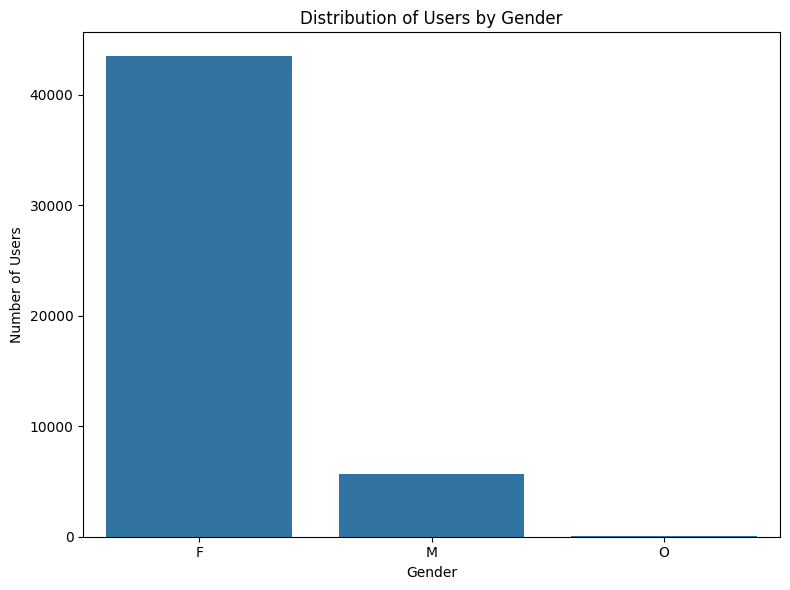

In [ ]:
print(df_cohort['gender'].value_counts().reset_index(name='count'),'\n')

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.countplot(x='gender', data=df_cohort)
plt.title('Distribution of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

###User Activity over the time
To see the user activity over the time a Bar plot is made using the user count in different month. It is clearly visible that active user per month are reducing conitnously.


  session_end  count
0     2023-01   4138
1     2023-02   5182
2     2023-03   5383
3     2023-04   3524
4     2023-05   3485
5     2023-06   3295
6     2023-07   2485 



<ipython-input-13-243631b3bdd0>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='session_end', y='count', data=user_activity_over_time, estimator=sum, ci=None)  # Use estimator=sum for total user count per month


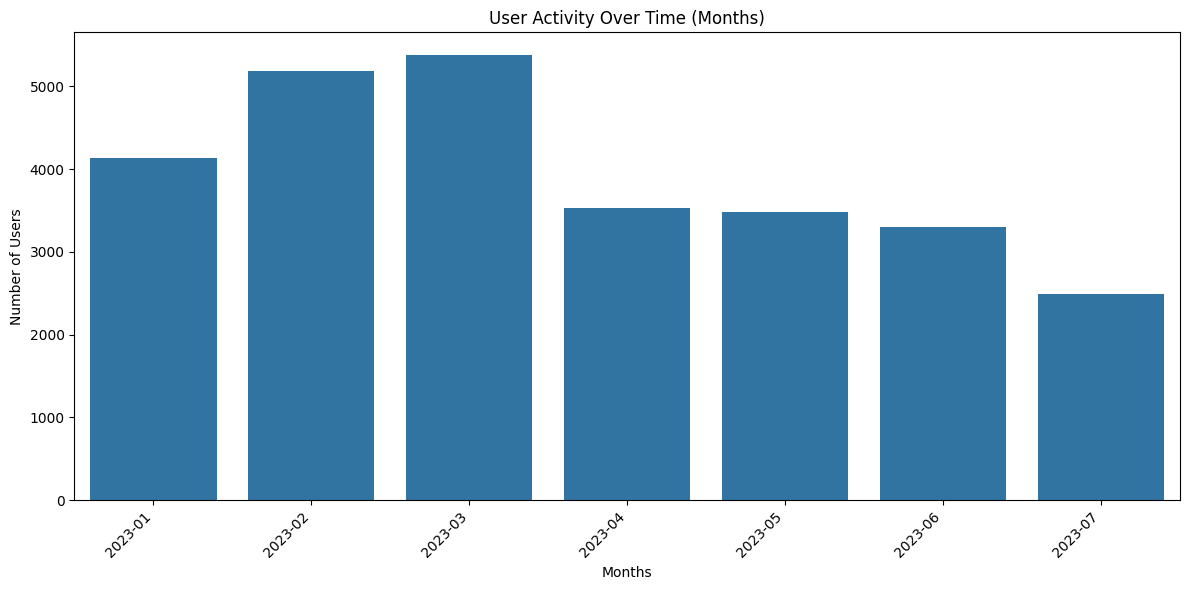

In [ ]:


# Group data by 'session_end' (truncated to month) and 'user_id', then count occurrences
user_activity_over_time = df_cohort.groupby([df_cohort['session_end'].dt.to_period('M'), 'user_id'])['user_id'].nunique().reset_index(name='count')

print(df_cohort.groupby([df_cohort['session_end'].dt.to_period('M')])['user_id'].nunique().reset_index(name='count'), '\n')

# Create the bar chart using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='session_end', y='count', data=user_activity_over_time, estimator=sum, ci=None)  # Use estimator=sum for total user count per month
plt.title('User Activity Over Time (Months)')
plt.xlabel('Months')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

###Successfull Trip count over the time
Bar plot is made to see the number of successful trips over the time, trip per month are decreasing gradually over the time.

In [ ]:
filtered_df = df_cohort[df_cohort['cancellation'] == False]
filtered_df[(filtered_df['trip_id'].isnull())&(filtered_df['return_flight_booked']==True)&(filtered_df['flight_booked']==False)]#.value_counts()

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd


  session_end  count
0     2023-01   3150
1     2023-02   3435
2     2023-03   3416
3     2023-04   1721
4     2023-05   1652
5     2023-06   1546
6     2023-07   1172 



<ipython-input-15-0f14640cba0b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='session_end', y='count', data=trip_activity_over_time, estimator=sum, ci=None)  # Use estimator=sum for total trip count per month


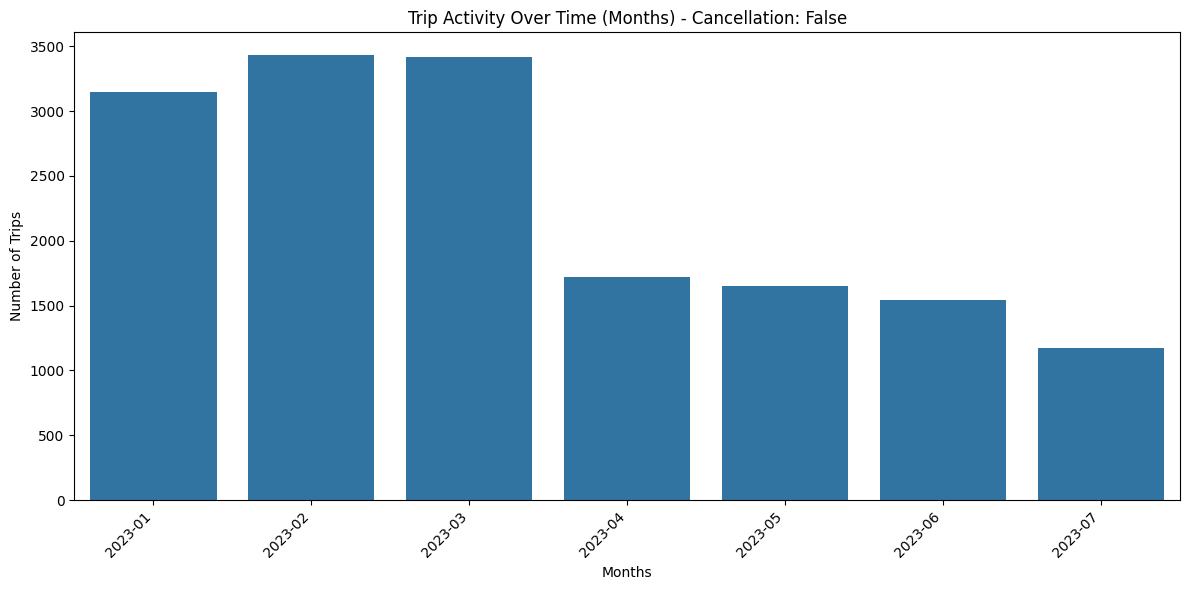

In [ ]:
# Filter data to include only successful trips having cancellation == False
filtered_df = df_cohort[df_cohort['cancellation'] == False]

print(filtered_df.groupby([filtered_df['session_end'].dt.to_period('M')])['trip_id'].nunique().reset_index(name='count'), '\n')

# Group filtered data by 'session_end' (truncated to month) and 'trip_id', then count occurrences
trip_activity_over_time = filtered_df.groupby([filtered_df['session_end'].dt.to_period('M'), 'trip_id'])['trip_id'].nunique().reset_index(name='count')

# Create the bar chart using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='session_end', y='count', data=trip_activity_over_time, estimator=sum, ci=None)  # Use estimator=sum for total trip count per month
plt.title('Trip Activity Over Time (Months) - Cancellation: False')
plt.xlabel('Months')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
#plt.grid()
plt.show()

###Cancelled Trip count
Bar plot is made to see the number of cancelled trips per month in given time span, the number and visualisation shows that cancelled trips per month are increased rapidly.


  session_end  count
0     2023-01     62
1     2023-02     70
2     2023-03     77
3     2023-04     54
4     2023-05     76
5     2023-06    106
6     2023-07    165 



<ipython-input-16-9911635dc57d>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='session_end', y='count', data=trip_activity_over_time, estimator=sum, ci=None)  # Use estimator=sum for total trip count per month


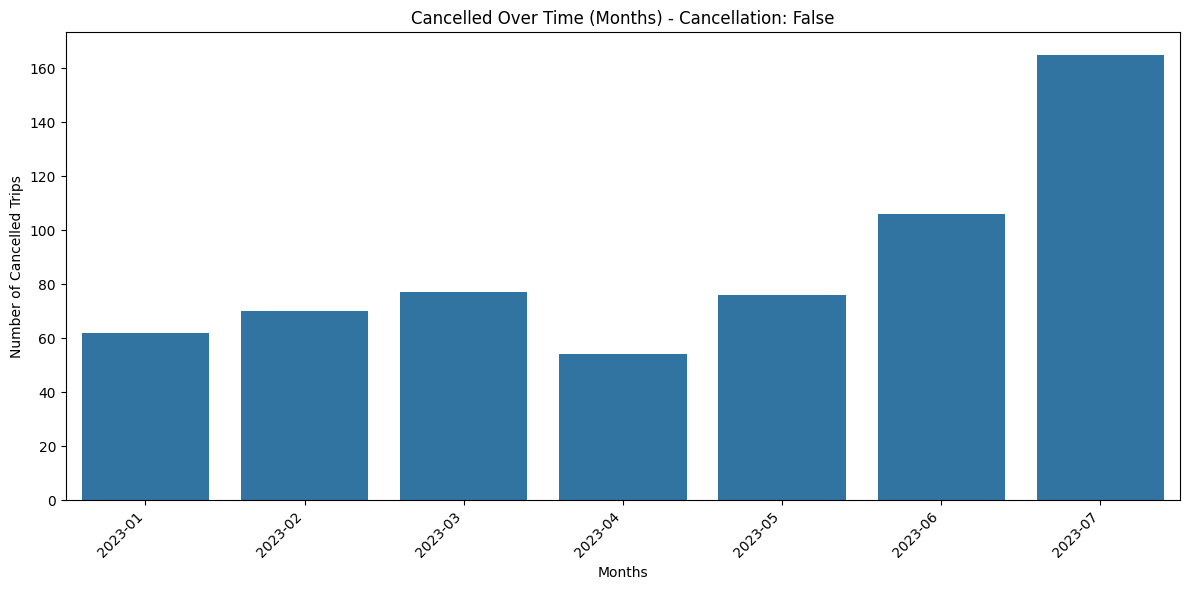

In [ ]:
# Filter data to include only cancelled trips having cancellation == True
df_cancelled_trips = df_cohort[df_cohort['cancellation'] == True]

print(df_cancelled_trips.groupby([df_cancelled_trips['session_end'].dt.to_period('M')])['trip_id'].nunique().reset_index(name='count'), '\n')

# Group filtered data by 'session_end' (truncated to month) and 'trip_id', then count occurrences
trip_activity_over_time = df_cancelled_trips.groupby([df_cancelled_trips['session_end'].dt.to_period('M'), 'trip_id'])['trip_id'].count().reset_index(name='count')

# Create the bar chart using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='session_end', y='count', data=trip_activity_over_time, estimator=sum, ci=None)  # Use estimator=sum for total trip count per month
plt.title('Cancelled Over Time (Months) - Cancellation: False')
plt.xlabel('Months')
plt.ylabel('Number of Cancelled Trips')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

###Location distribution of Users
Majority of Traveltide users belong to USA.


home_country
usa       40976
canada     8235
Name: count, dtype: int64 



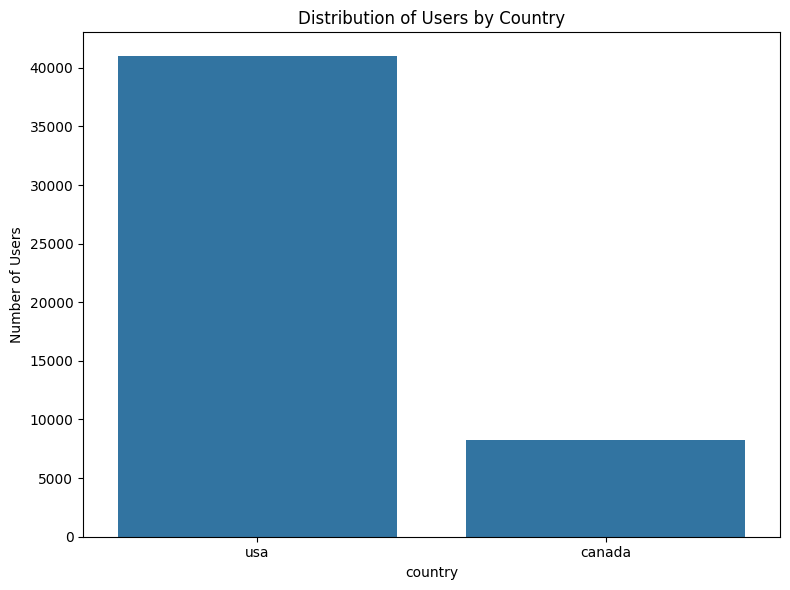

In [ ]:
print(df_cohort['home_country'].value_counts(),'\n')

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.countplot(x='home_country', data=df_cohort)
plt.title('Distribution of Users by Country')
plt.xlabel('country')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

## v- Numerical data exploration

In [ ]:
df_cohort.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
flight_discount_amount,5880.0,0.139473,0.083991,0.050,0.1000,0.100,0.2000,0.600
hotel_discount_amount,3976.0,0.112865,0.062845,0.050,0.0500,0.100,0.1500,0.450
page_clicks,49211.0,17.588791,21.495987,1.000,6.0000,13.000,22.0000,566.000
home_airport_lat,49211.0,38.427222,6.185962,21.316,33.8180,39.103,42.2380,61.251
home_airport_lon,49211.0,-94.183762,18.065868,-157.927,-112.3830,-90.035,-79.3700,-63.499
seats,14270.0,1.215207,0.585891,1.000,1.0000,1.000,1.0000,8.000
return_flight_booked,14270.0,0.956692,0.203556,0.000,1.0000,1.000,1.0000,1.000
checked_bags,14270.0,0.592922,0.677641,0.000,0.0000,1.000,1.0000,8.000
destination_airport_lat,14270.0,38.610024,6.949739,-37.008,33.9420,39.872,42.4090,55.972
destination_airport_lon,14270.0,-88.947203,33.090373,-157.927,-112.3830,-87.752,-75.2410,174.792


### **Night anomaly**
1335 rows have night-stay recorded as equal or less than 0. Below is its distribution.


-    0 nights  in 1228 rows
-    -1 nights in 106 rows
-    -2 nights in  1 rows


- 1228 rows of 0 nights, out of these, 1104 rows shows `check_out_time` > `check_in_time`, indicating user stayed less than 24 hrs, that result in nights recorded as 0,  rest of these 124 rows shows that 'check_out_time'<= 'check_in_time'. This discrepancy is unusual for typical hotel stays and indicates some error in data.

- 107 rows that result in nights -1, -2, have 'check_out_time'<= 'check_in_time'.

-------------------------

####**Possible Explanations:**

It is hypothesized that this discrepancy could be due to one of the following reasons:

**Human Error:**
The hotel staff might not have been able to record the actual check-out time properly, leading to the default value of 11:00 AM being entered.

**System Error:**
A system error could have prevented the accurate recording of the `check_out_time`.

####**Further Observations:**

Upon examining the data for these rows, consistent patterns related to `user_id`, `hotel_name`, `destination`, or `airline` are not found. This suggests that the discrepancy might not be ** specific** to any particular user, location or travel arrangements.

####**Proposed Solution:**

Given these observations, calculating the nights (duration of hotel stay) using the time difference between `return_time` and `check_in_time` is propsed and followed. This approach provides a reasonable estimate of the stay duration based on the available information.



In [ ]:
df_cohort[(df_cohort['nights']<=0)
        & (df_cohort['check_out_time'] <= df_cohort['check_in_time'])
        ].nights.value_counts()

,count
nights,
0.0,124
-1.0,106
-2.0,1


In [ ]:
#df_cohort[df_cohort['nights']<=0][['departure_time','return_time','nights','check_in_time','check_out_time']]
df_cohort['hotel_stay_hrs'] = np.nan

# filter1 target the rows where nights <= 0 and 'check_out_time' is greater than 'check_in_time'
filter1 = (df_cohort['nights']<=0) & (df_cohort['check_out_time']> df_cohort['check_in_time'])
df_cohort.loc[filter1,'hotel_stay_hrs'] = (df_cohort['check_out_time'] - df_cohort['check_in_time']).dt.total_seconds()/3600
# filter 1: 1104 rows are effected
filter1_row_indexes = df_cohort[filter1].index


# filter2 target the rows where nights <= 0 and 'check_out_time' is less than or equal to 'check_in_time'
filter2 = (df_cohort['nights']<=0) & (df_cohort['check_out_time']<= df_cohort['check_in_time'])
df_cohort.loc[filter2,'hotel_stay_hrs'] = (df_cohort['return_time'] - df_cohort['check_in_time']).dt.total_seconds()/3600
# filter2 : 231 rows
filter2_row_indexes = df_cohort[filter2].index

# filter3 target the rows where nights > 0 and 'check_out_time' is greater than 'check_in_time'
filter3 = (df_cohort['nights']>0) & (df_cohort['check_out_time']> df_cohort['check_in_time'])
df_cohort.loc[filter3,'hotel_stay_hrs'] = (df_cohort['check_out_time'] - df_cohort['check_in_time']).dt.total_seconds()/3600
# filter 3: 13391 rows
filter3_row_indexes = df_cohort[filter3].index
#filter3_row_indexes




df_cohort['hotel_stay_hrs'].value_counts().sum()
#print(len(filter1_row_indexes) + len(filter2_row_indexes) + len(filter3_row_indexes))


np.int64(14717)

In [ ]:
#nights_indexes =
df_cohort['nights'].notnull().sum()

np.int64(14726)

For following rows, there is no return time available and checkout time is also not right, so the absolute value of nights is being taken.


In [ ]:
cols = ['nights','user_id','departure_time','return_time','check_out_time', 'check_in_time', 'hotel_stay_hrs']
df_cohort[(df_cohort['nights'].notnull()) & (df_cohort['hotel_stay_hrs'].isnull())][cols]

,nights,user_id,departure_time,return_time,check_out_time,check_in_time,hotel_stay_hrs
1466,0.0,548672,2023-02-22 08:00:00,NaT,2023-02-22 11:00:00,2023-02-22 11:54:08,NaN
6253,-1.0,566762,2023-03-06 12:00:00,NaT,2023-03-06 11:00:00,2023-03-06 18:18:11,NaN
11604,-1.0,514627,2023-03-19 10:00:00,NaT,2023-03-19 11:00:00,2023-03-19 12:49:25,NaN
13434,0.0,528827,2023-03-23 07:00:00,NaT,2023-03-23 11:00:00,2023-03-23 11:03:20,NaN
20895,-1.0,524211,2023-04-29 12:00:00,NaT,2023-04-29 11:00:00,2023-04-29 14:40:43,NaN
29094,0.0,491182,2023-06-19 09:00:00,NaT,2023-06-19 11:00:00,2023-06-19 11:17:27,NaN
34470,-1.0,514627,2023-03-19 10:00:00,NaT,2023-03-19 11:00:00,2023-03-19 12:49:25,NaN
38826,-1.0,532215,2023-01-23 09:00:00,NaT,2023-01-23 11:00:00,2023-01-23 15:33:30,NaN
46316,0.0,570626,2023-02-10 09:00:00,NaT,2023-02-10 11:00:00,2023-02-10 11:39:37,NaN


In [ ]:
# filter4 target the rows where return time is null and checkout time is not right.
# observation: 9 rows,  where 'check_out_time' is less than 'check_in_time'
filter4 = (df_cohort['nights'].notnull()) & (df_cohort['hotel_stay_hrs'].isnull())
df_cohort.loc[filter4,'hotel_stay_hrs'] = (df_cohort['nights'].abs())*24
filter4_row_indexes = df_cohort[filter4].index
#df_cohort.iloc[[7412, 11773, 16560, 21911, 23741, 31202, 39401, 44777, 49133]][['nights','hotel_stay_hrs']]

### **Trips information**
16702 trips total, out of these (independent of cancellation)

- 16090 unique trips

- 12537 / 16702 trips flight booked ✅ and hotel booked ✅
- 1783 / 16702 trips  flight booked ✅ not hotel booked ❌
- 2382 / 16702 trips  flight booked ❌ but hotel booked ✅
- 0 trips    flight booked ❌ and hotel booked ❌


Cancelled Trips
- 610 / 16702 trips


Successful trips
- 16092 / 16702 trips made

- 13710 / 16092 trips flights booked ✅
- 11927 / 13710 trips flights booked ✅  hotel booked ✅
- 1783 / 13710  trips flights booked ✅  notel booked ❌
- 2382 / 13710  trips flights booked ❌  notel booked ✅
- 0 trips             flights booked ❌  hotel booked ❌




In [ ]:
# Trips information in reference to flight and hotel
unique_trip_ids = df_cohort['trip_id'].unique()
df_unique_trips = df_cohort[df_cohort['trip_id'].isin(unique_trip_ids)]
# df_unique_trips

df_unique_trips[
          (df_unique_trips['trip_id'].notnull()) &
          (df_unique_trips['flight_booked']==True) &
          (df_unique_trips['hotel_booked']==True)
          ]

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,destination_airport_lat,destination_airport_lon,base_fare_usd,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,hotel_stay_hrs
1,459645-7f696a96417f47fda2f8d2955c961c5a,459645,459645-31f1c032b1b7483ca279a20ccac0dd40,2023-02-11 13:14:00,2023-02-11 13:18:04,False,False,NaN,NaN,True,...,45.323,-75.669,695.78,Four Seasons - ottawa,5.0,2.0,2023-02-19 11:29:38,2023-02-24 11:00:00,119.0,119.506111
4,473332-e66dbbefcc7d4e2aa3d34d173b2c2d4b,473332,473332-fb6ae60899ea4651b707286c646f675c,2023-02-11 21:02:00,2023-02-11 21:08:16,False,False,NaN,NaN,True,...,39.872,-75.241,640.06,Wyndham - philadelphia,1.0,1.0,2023-02-19 14:49:13,2023-02-21 11:00:00,212.0,44.179722
6,476270-601e6ad5a4cf4c3b8b4f8aa1b2edc328,476270,476270-dbd71b0107454db384ef6221231a62c5,2023-02-11 20:07:00,2023-02-11 20:11:00,False,False,NaN,NaN,True,...,32.847,-96.852,470.70,Hilton - dallas,0.0,1.0,2023-02-18 15:19:14,2023-02-19 11:00:00,103.0,19.679444
17,497042-9f5ff77de9da457f83aafc39cae24667,497042,497042-685637506373411184ce92c38342f085,2023-02-11 19:25:00,2023-02-11 19:27:58,False,False,NaN,NaN,True,...,45.517,-73.417,373.96,Conrad - montreal,2.0,1.0,2023-02-20 22:55:25,2023-02-23 11:00:00,86.0,60.076389
25,501947-4e0df3c09156412cabc95f22b968bfcd,501947,501947-bd52e9f6e5d8480488e51a22872e77a0,2023-02-11 17:33:00,2023-02-11 17:45:36,False,False,NaN,NaN,True,...,41.786,-87.752,126.34,NH Hotel - chicago,0.0,1.0,2023-02-18 09:54:05,2023-02-18 11:00:00,144.0,1.098611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49194,348817-9e9e738719184bc682c72f0b2ea672b3,348817,348817-83c86d10ab384052bb5bf310849dd404,2023-02-11 02:14:00,2023-02-11 02:16:36,False,False,NaN,NaN,True,...,37.362,-121.929,299.81,Conrad - san jose,2.0,1.0,2023-02-15 13:03:52,2023-02-18 11:00:00,122.0,69.935556
49196,361759-8dc14585fa38440e9ba9c807249060ea,361759,361759-d3fcb136635d49248b28c2cdbbb8ec1c,2023-02-11 19:29:00,2023-02-11 19:31:22,False,False,NaN,NaN,True,...,33.942,-118.408,486.71,Shangri-La - los angeles,0.0,1.0,2023-02-21 17:05:48,2023-02-22 11:00:00,88.0,17.903333
49202,428552-de115f0990f847048b04f5dcb0bba5bc,428552,428552-bbf8b39323224fa39276d773b834662b,2023-02-11 21:09:00,2023-02-11 21:11:02,True,False,NaN,NaN,True,...,32.820,-97.362,369.81,Banyan Tree - fort worth,1.0,1.0,2023-02-18 11:49:38,2023-02-19 11:00:00,378.0,23.172778
49208,452612-ba99dbbd2ab648e38683b0301f178ab2,452612,452612-569e933c38de4ecf87a66bdd8556dce4,2023-02-11 18:57:00,2023-02-11 19:12:50,False,True,NaN,NaN,True,...,32.699,-117.215,565.43,Wyndham - san diego,3.0,1.0,2023-02-25 14:31:26,2023-03-01 11:00:00,153.0,92.476111


In [ ]:
#trips information with cancellaiton false
unique_trip_ids = df_cohort['trip_id'].unique()
df_unique_trips = df_cohort[df_cohort['trip_id'].isin(unique_trip_ids)& (df_cohort['cancellation']==False)]

df_unique_trips[
          (df_unique_trips['trip_id'].notnull())&
          (df_unique_trips['flight_booked']==False) #&
          #(df_unique_trips['hotel_booked']==False)
          ]

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,destination_airport_lat,destination_airport_lon,base_fare_usd,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,hotel_stay_hrs
2,466342-af4b9a80d5f54f1fac2021dfe3da50a6,466342,466342-cc66dcf3fd9f4d0081cde3ec98e43c35,2023-02-11 07:26:00,2023-02-11 07:27:30,False,False,NaN,NaN,False,...,NaN,NaN,NaN,Extended Stay - new york,16.0,2.0,2023-02-24 11:00:00,2023-03-12 11:00:00,210.0,384.0
96,521658-71ea351fa7e34e1485600f475ba969f3,521658,521658-00ab9578f7c5412baaa194e005ea1bf0,2023-02-11 21:22:00,2023-02-11 21:24:10,False,False,NaN,NaN,False,...,NaN,NaN,NaN,Hilton - calgary,5.0,1.0,2023-02-21 11:00:00,2023-02-26 11:00:00,98.0,120.0
118,528522-545b7f50904b43c7a513d60eb472f7db,528522,528522-fbf1397544ea45cbbfa06e781f456aff,2023-02-11 22:21:00,2023-02-11 22:22:44,False,False,NaN,NaN,False,...,NaN,NaN,NaN,Banyan Tree - chicago,2.0,2.0,2023-03-02 11:00:00,2023-03-04 11:00:00,151.0,48.0
165,542914-4e591f6441354448aeaf762c5e8d9621,542914,542914-66d84b0739d84162aec3558e9c6556cd,2023-02-11 15:53:00,2023-02-11 15:55:21,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NH Hotel - new york,10.0,1.0,2023-02-16 11:00:00,2023-02-26 11:00:00,228.0,240.0
169,544163-d1ad79aa768540a9bb68ff0e96c60645,544163,544163-95843ed329ba42cbb3db0107fc4f4d2b,2023-02-11 17:55:00,2023-02-11 17:56:33,True,False,NaN,NaN,False,...,NaN,NaN,NaN,Banyan Tree - san antonio,6.0,2.0,2023-02-14 11:00:00,2023-02-20 11:00:00,102.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49055,562334-6b04e66a341f4990a9c3c666dc518465,562334,562334-985f150748904e2abdae65442fb3d45c,2023-02-10 16:22:00,2023-02-10 16:24:00,False,False,NaN,NaN,False,...,NaN,NaN,NaN,Extended Stay - fort worth,6.0,1.0,2023-02-16 11:00:00,2023-02-22 11:00:00,151.0,144.0
49111,581385-febc4e43757d458f87cb5fb22b8f6bd4,581385,581385-e0bed86bb9be415b91e5cab1eec5be3d,2023-02-10 17:34:00,2023-02-10 17:36:55,True,False,NaN,NaN,False,...,NaN,NaN,NaN,InterContinental - columbus,4.0,1.0,2023-02-19 11:00:00,2023-02-23 11:00:00,233.0,96.0
49138,584549-cdf975c6fd2e48bd87d04573c49e3e0d,584549,584549-990d997af7a74212b06f7b1427f1b0c7,2023-02-10 15:08:00,2023-02-10 15:11:07,True,False,NaN,NaN,False,...,NaN,NaN,NaN,Aman Resorts - ottawa,3.0,1.0,2023-02-15 11:00:00,2023-02-18 11:00:00,310.0,72.0
49147,584998-ba2877469d0f4b0ea43f3b7219123478,584998,584998-ed4b598b754f4a6d93a8081d43afb5fc,2023-02-10 17:31:00,2023-02-10 17:32:58,False,True,NaN,NaN,False,...,NaN,NaN,NaN,InterContinental - detroit,9.0,1.0,2023-02-16 11:00:00,2023-02-25 11:00:00,34.0,216.0


#4- Features Engineering
Following new features have been generated using given features of dataset.
- corrected_nights => after correcting the night anomaly
- session_duration => difference(mint) of end and start point of each session.
- trip duration
- Age => difference(years) between the latest date of session_end and user's Date of birth
- user_since => the duration (days) since the user signed up till the latest session_end
- distance_flown => distance(km) between origin and destination airport
- Total cnacelled flights
- total flight booked
- hotel expenditure
- flight expenditure
-total spent


###corrected_nights


In [ ]:
df_cohort['corrected_nights']= round(df_cohort['hotel_stay_hrs']/24,2)
df_cohort[df_cohort['corrected_nights'] < 1]['corrected_nights'].value_counts()

,count
corrected_nights,
0.97,116
0.98,82
0.96,71
0.88,64
0.99,60
...,...
0.49,3
0.51,2
0.52,2


### Session duration
Session duration is calculated by taking the difference of end and start point of each session.

In [ ]:
#session duration
df_cohort['session_duration']= ((df_cohort['session_end']) -(df_cohort['session_start'])).astype('timedelta64[s]')
df_cohort['session_duration']= round((df_cohort['session_duration'].dt.total_seconds()),2)

### Trip duration
is calculated in hours by taking the difference of departure_time and return time of flights if flight_booked is true, else the differnce of check_out_time and check_in_time.

In [ ]:
# trip duration in hours
df_cohort['trip_duration'] = (np.where(df_cohort['flight_booked'],
                                       (df_cohort['return_time'] - df_cohort['departure_time']).dt.total_seconds() / 3600,
                                       (df_cohort['check_out_time'] - df_cohort['check_in_time']).dt.total_seconds() / 3600))

### Age
To calculate the age of user the difference is taken from max date in session_end to their birth date.

In [ ]:
# age of user
def calculate_age(born):
    last_date = df_cohort['session_end'].max()
    return last_date.year - born.year - ((last_date.month, last_date.day) < (born.month, born.day))

df_cohort['age'] = df_cohort['birthdate'].apply(calculate_age)


### User_since
The duration in days between max of session_end and user sign update is calculated as user_since that shows the span of their subscription to traveltide.

In [ ]:
# the duration (in days) since the user signed up till the latest session_end is calculated and names as 'user_since'
df_cohort['user_since'] = (df_cohort['sign_up_date'].max() - df_cohort['sign_up_date']).dt.days


### Distance flown
To Calculate the distance flown in a flight, lattitude and longitude values of origin and destination airports of each flight are used and is calculated using haversine calculation.

In [ ]:
# Calculating distance using lattitude and longitude values of origin and destination points of each flight.

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculates the Haversine distance between two points on the Earth.

    Args:
    lat1, lon1: Latitude and longitude of the first point.
    lat2, lon2: Latitude and longitude of the second point.

    Returns:
    The distance between the two points in kilometers.
    """
    return haversine((lat1, lon1), (lat2, lon2), unit=Unit.KILOMETERS)
df_cohort['distance_flown'] = df_cohort.apply(lambda row: haversine_distance(row['home_airport_lat'], row['home_airport_lon'], row['destination_airport_lat'], row['destination_airport_lon']), axis=1)

### Total cancelled Flight
The sum of cancelled departure and return flights is used as total_cancelled_flight.

In [ ]:
# calculting total cancel flights
df_cancelled_trips = df_cohort[df_cohort['cancellation'] == True]
print(df_cohort[df_cohort['cancellation'] == True][['flight_booked', 'return_flight_booked']].value_counts())
df_cohort['total_cancel_flights'] = (df_cancelled_trips['flight_booked'].replace({True:1 , False:0})) + (df_cancelled_trips['return_flight_booked'].replace({True:1 , False:0}))



flight_booked  return_flight_booked
True           1.0                     539
               0.0                      21
Name: count, dtype: int64


<ipython-input-32-6bd56e543377>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cohort['total_cancel_flights'] = (df_cancelled_trips['flight_booked'].replace({True:1 , False:0})) + (df_cancelled_trips['return_flight_booked'].replace({True:1 , False:0}))


### Total Flight booked
The sum of departure and return flights is used as total_flight_booked,

In [ ]:
# calculting total flights
df_cohort['total_flights_booked'] = (df_cohort['flight_booked'].replace({True:1 , False:0})) + (df_cohort['return_flight_booked'].replace({True:1 , False:0}))



<ipython-input-33-c25d020d3aac>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cohort['total_flights_booked'] = (df_cohort['flight_booked'].replace({True:1 , False:0})) + (df_cohort['return_flight_booked'].replace({True:1 , False:0}))


### Hotel_expenditure
Hotel expenditure is calculated by multiplying number of nights by rooms by hotel_room_usd if hotel_discount is false, else number of nights by room is multiplied to hotel_room_usd and discount.

In [ ]:
# hotel_expenditure
condition_hotel_exp= ((df_cohort['hotel_booked']==True) & (df_cohort['cancellation']==False))

df_hotel_expd_false = df_cohort[(df_cohort['hotel_discount'] == False) & condition_hotel_exp][['hotel_discount', 'hotel_discount_amount','nights', 'hotel_per_room_usd', 'rooms']]
df_hotel_expd_false['hotel_expd']= df_hotel_expd_false['hotel_per_room_usd'] * df_hotel_expd_false['rooms'] * df_hotel_expd_false ['nights']
a = df_hotel_expd_false['hotel_expd'].value_counts()

#df_hotel_expd_false
df_hotel_expd_true = df_cohort[(df_cohort['hotel_discount'] == True) & condition_hotel_exp][['hotel_discount', 'hotel_discount_amount','nights', 'hotel_per_room_usd', 'rooms']]
df_hotel_expd_true['hotel_expd'] = df_hotel_expd_true['hotel_per_room_usd'] * df_hotel_expd_true['rooms'] * df_hotel_expd_true['nights'] #* (1-df_hotel_expd_true['hotel_discount_amount'])
#df_hotel_expd_true

df_cohort['hotel_expenditure'] = np.nan
df_cohort.loc[condition_hotel_exp &
              (df_cohort['hotel_discount'] == False),'hotel_expenditure'] = df_hotel_expd_false['hotel_expd']
df_cohort.loc[condition_hotel_exp &
              (df_cohort['hotel_discount'] == True),'hotel_expenditure'] = df_hotel_expd_true['hotel_expd']

#df_cohort['hotel_expenditure'].value_counts()



### Flight_expenditure
If flight_discount is false,then the flight expenditure is calculated directly multiplying the number of seats to base fare price, on contrary when flight discount is present the  considering the discount amount, cost is calculated.

In [ ]:
# flight_expenditure
condition_flight_exp= ((df_cohort['flight_booked']==True) & (df_cohort['cancellation']==False))

df_flight_expd_false = df_cohort[(df_cohort['flight_discount'] == False) & condition_flight_exp][['flight_discount', 'flight_discount_amount','seats', 'base_fare_usd', 'return_flight_booked']]
df_flight_expd_false['flight_expd']= df_flight_expd_false['base_fare_usd'] * df_flight_expd_false['seats']
a = df_flight_expd_false['flight_expd'].value_counts()

#df_flight_expd_false
df_flight_expd_true = df_cohort[(df_cohort['flight_discount'] == True) & condition_flight_exp][['flight_discount', 'flight_discount_amount','seats', 'base_fare_usd', 'return_flight_booked']]
df_flight_expd_true['flight_expd'] = df_flight_expd_true['base_fare_usd'] * df_flight_expd_true['seats'] * (1-df_flight_expd_true['flight_discount_amount'])
#df_flight_expd_true

df_cohort['flight_expenditure'] = np.nan
df_cohort.loc[condition_flight_exp &
              (df_cohort['flight_discount'] == False),'flight_expenditure'] = df_flight_expd_false['flight_expd']
df_cohort.loc[condition_flight_exp &
              (df_cohort['flight_discount'] == True),'flight_expenditure'] = df_flight_expd_true['flight_expd']

#df_cohort['flight_expenditure'].value_counts()

###Total spent
This feature is created to have total amount of user expenditure by adding its hotel and flight spendings.

In [ ]:
df_cohort['total_spent'] = df_cohort['hotel_expenditure'] + df_cohort['flight_expenditure']

#5- Creating User based Tables

###User Information table

In [ ]:
# User information
df_user_info = df_cohort[['user_id','age','gender','married','has_children','home_country','home_city','home_airport','user_since']]
df_user_info.drop_duplicates(inplace=True)
#df_user_info['gender'] = df_user_info['gender'].replace({'M':1,'F':0})
#df_user_info['married'] = df_user_info['married'].replace({True:1 ,False:0})
#df_user_info['has_children'] = df_user_info['has_children'].replace({True:1, False:0})
df_user_info['home_country'] = df_user_info['home_country'].str.strip().replace({'usa': 'USA', 'canada': 'Canada'})
df_user_info['home_city'] = df_user_info['home_city'].str.strip().str.title()
df_user_info = df_user_info.rename(columns={'user_since': 'user_since_days'})

df_user_info

<ipython-input-37-3ab4abe4cc11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_info.drop_duplicates(inplace=True)
<ipython-input-37-3ab4abe4cc11>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_info['home_country'] = df_user_info['home_country'].str.strip().replace({'usa': 'USA', 'canada': 'Canada'})
<ipython-input-37-3ab4abe4cc11>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,user_id,age,gender,married,has_children,home_country,home_city,home_airport,user_since_days
0,458725,16,F,False,False,USA,Montgomery,MXF,160
1,459645,29,F,False,False,USA,Wichita,ICT,160
2,466342,16,M,False,False,Canada,Montreal,YUL,156
3,468666,42,F,False,True,USA,Richmond,RIC,155
4,473332,49,F,True,False,USA,Los Angeles,LAX,153
...,...,...,...,...,...,...,...,...,...
27149,531795,69,F,False,False,USA,San Francisco,SFO,123
27302,536876,29,F,False,False,USA,Minneapolis,MSP,121
27576,514076,56,F,True,True,USA,New York,JFK,132
27822,510283,17,F,False,False,Canada,Edmonton,YED,134


###User Aggregated Table (exluding cancel flights)

In [ ]:
# Filter data to include only trips with cancellation == False
df_cancelled_trips = df_cohort[df_cohort['cancellation'] == False]

df_user_based_1= df_cancelled_trips.groupby(['user_id']).agg({

    #trip info
    'trip_id': 'count',
    'trip_duration': 'sum',
  # 'trip_duration': 'mean',
    'destination': 'nunique',
    'total_spent': 'sum',




    #hotel info
    'hotel_name': 'count',
    'hotel_booked': lambda c: c.eq(True).sum(),  # Count number of time hotel booked values
    'corrected_nights': 'sum',
    'rooms': 'sum',
 #   'hotel_discount': lambda d: d.eq(True).sum(),  # Count True values
    'hotel_expenditure': 'sum',


    #flight info

    'total_flights_booked': 'sum',
    'return_flight_booked': lambda b: b.eq(True).sum(), #count true return flights
    'total_cancel_flights': 'sum',
 #   'flight_discount': lambda b: b.eq(True).sum(),  # Count True values
    'seats': 'sum',
    'checked_bags': 'sum',
    'distance_flown': 'sum',
  # 'distance_flown': 'mean',
    'flight_expenditure': 'sum',
    'trip_airline': 'nunique',
    'destination_airport': 'nunique',
    'origin_airport': 'nunique',





}).rename(columns={


    #trip info
    'trip_id': 'total_successfull_trip',
    'trip_duration': 'total_trip_duration_hrs',
 #  'trip_duration': 'avg_trip_duration_hrs',
    'destination': 'unique_destination_city',
    'total_spent': 'Total_spent',


    # hotel info
    'hotel_name': 'num_hotel_stayed',  # Count of possible hotel stays
    'hotel_booked': 'total_hotel_booking',  # Count number of time hotel booked values
    'corrected_nights': 'total_nights',
    'rooms': 'total_room',
 #   'hotel_discount': 'hotel_discounted_booking',  # Count True values
    'hotel_expenditure': 'total_hotel_expenditure',


    #flight info
    'total_flights_booked': 'total_flight_booked',  # Count True values
    'return_flight_booked': 'total_return_flight',  # Count True values
    'total_cancel_flights': 'total_cancel_flights',
#    'flight_discount': 'flight_discounted_booking',  # Count True values
    'seats': 'total_seat',
    'checked_bags': 'total_checked_bags',
    'distance_flown': 'total_distance_flown_km',
#  'distance_flown': 'avg_distance_flown_km',
    'flight_expenditure': 'total_flight_expenditure',
    'trip_airline': 'total_airline_used',
    'destination_airport': 'total_destination_airport_used',
    'origin_airport': 'total_origin_airport_used'


  }).reset_index()


df_user_based_1

,user_id,total_successfull_trip,total_trip_duration_hrs,unique_destination_city,Total_spent,num_hotel_stayed,total_hotel_booking,total_nights,total_room,total_hotel_expenditure,total_flight_booked,total_return_flight,total_cancel_flights,total_seat,total_checked_bags,total_distance_flown_km,total_flight_expenditure,total_airline_used,total_destination_airport_used,total_origin_airport_used
0,23557,2,480.0,0,0.00,2,2,20.00,3.0,3802.0,0.0,0,0.0,0.0,0.0,0.000000,0.00,0,0,0
1,94883,2,72.0,2,1617.26,2,2,1.89,3.0,130.0,4.0,2,0.0,3.0,1.0,2907.336271,1487.26,2,2,1
2,101486,2,216.0,1,948.91,2,2,8.91,3.0,2199.0,2.0,1,0.0,1.0,0.0,965.341901,189.91,1,1,1
3,101961,5,576.0,5,3126.99,5,5,21.74,5.0,2429.0,10.0,5,0.0,5.0,2.0,6608.430041,1192.99,5,5,1
4,106907,1,312.0,1,87669.36,1,1,11.05,3.0,4257.0,2.0,1,0.0,6.0,5.0,13402.341589,83412.36,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,792549,4,288.0,4,373.10,1,1,4.81,1.0,144.0,8.0,4,0.0,4.0,2.0,5751.868824,1039.17,4,4,1
5994,796032,3,456.0,3,1982.52,2,2,8.38,2.0,1261.0,6.0,3,0.0,4.0,3.0,10530.112384,721.52,3,3,1
5995,801660,3,216.0,1,923.83,3,3,6.92,3.0,872.0,6.0,3,0.0,3.0,1.0,2163.384344,263.83,3,2,1
5996,811077,1,192.0,1,1431.79,1,1,6.79,1.0,852.0,2.0,1,0.0,1.0,0.0,3184.847824,579.79,1,1,1


###User Aggregated Table

In [ ]:
df_user_based_2= df_cohort.groupby(['user_id']).agg({
     #session info
    'session_id': 'count',
    'page_clicks': 'sum',
    'session_duration': 'sum',
    #'session_duration': 'mean',


    #trip info
    'trip_id': 'count',
    'cancellation': lambda c: c.eq(True).sum(),


}).rename(columns={

     #session info
    'session_id': 'total_session',
    'page_clicks': 'total_clicks',
    'session_duration': 'total_session_duration_sec',
    #'session_duration': 'avg_session_duration_sec',

    #trip info
    'trip_id': 'trip_count',
    'cancellation': 'total_cancellation',





  }).reset_index()


df_user_based_2

,user_id,total_session,total_clicks,total_session_duration_sec,trip_count,total_cancellation
0,23557,8,82,613.0,2,0
1,94883,8,73,542.0,2,0
2,101486,8,131,978.0,2,0
3,101961,8,126,942.0,5,0
4,106907,8,240,6071.0,2,1
...,...,...,...,...,...,...
5993,792549,8,114,855.0,4,0
5994,796032,8,148,4362.0,4,1
5995,801660,8,115,848.0,3,0
5996,811077,8,105,793.0,1,0


In [ ]:
discounted_flight_df = (df_cohort[(df_cohort['cancellation'] == False) & (df_cohort['flight_booked'] == True) & (df_cohort['flight_discount'] == True)]).groupby('user_id')['flight_discount'].apply(lambda b: b.eq(True).sum()).reset_index()
discounted_flight_df.rename(columns={'flight_discount': 'total_discounted_flight'}, inplace=True)
#discounted_flight_df.describe()

In [ ]:
discounted_hotel_df = (df_cohort[(df_cohort['cancellation'] == False) & (df_cohort['hotel_booked'] == True) & (df_cohort['hotel_discount'] == True)]).groupby('user_id')['hotel_discount'].apply(lambda b: b.eq(True).sum()).reset_index()
discounted_hotel_df.rename(columns={'hotel_discount': 'total_discounted_hotel'}, inplace=True)
#discounted_hotel_df

#6- Join user based tables

In [ ]:
df_user_based = pd.merge(df_user_info, df_user_based_2, on='user_id', how='left')
df_user_based = pd.merge(df_user_based, df_user_based_1, on='user_id', how='left')
df_user_based = pd.merge(df_user_based, discounted_flight_df , on='user_id', how='left')
df_user_based = pd.merge(df_user_based, discounted_hotel_df , on='user_id', how='left')

df_user_based.T

,0,1,2,3,4,5,6,7,8,9,...,5988,5989,5990,5991,5992,5993,5994,5995,5996,5997
user_id,458725,459645,466342,468666,473332,474464,476270,476535,478533,481292,...,516176,511055,514300,350648,519412,531795,536876,514076,510283,508891
age,16,29,16,42,49,56,50,47,47,31,...,50,34,39,17,49,69,29,56,17,16
gender,F,F,M,F,F,F,M,F,F,F,...,O,F,M,F,F,F,F,F,F,F
married,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
has_children,False,False,False,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
home_country,USA,USA,Canada,USA,USA,USA,Canada,Canada,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,Canada,USA
home_city,Montgomery,Wichita,Montreal,Richmond,Los Angeles,New York,Edmonton,Vancouver,Phoenix,San Jose,...,New York,Des Moines,Oklahoma City,Lincoln,Houston,San Francisco,Minneapolis,New York,Edmonton,San Antonio
home_airport,MXF,ICT,YUL,RIC,LAX,LGA,YXD,YVR,PHX,SJC,...,JFK,DSM,TIK,LNK,EFD,SFO,MSP,JFK,YED,RND
user_since_days,160,160,156,155,153,152,151,151,150,149,...,131,133,132,225,129,123,121,132,134,134
total_session,8,9,8,10,8,8,8,9,8,8,...,8,8,8,8,8,8,8,9,8,8


#7- CSV Created

In [ ]:
#(df_user_based['total_discounted_flight']/df_user_based['total_flight_booked']).value_counts()

In [ ]:
df_user_based.to_csv('user_based_table.csv', index=False)


Please move on to Notebook #3.

Notebook #2:This notebook contains the EDA and creation of userbased table for M.L. https://colab.research.google.com/drive/1nNKIfJUCpx0ck2U2BAn800pSYgmSdw-T?usp=sharing

Notebook #3:
This notebook contains the PCA and clustring. https://colab.research.google.com/drive/1LrMeTDgjzStPT4a8MwGloUZSqwEHLKvr?usp=sharing

Notebook #1:This note book includes the data retreiving from database, selecting cohort and creating  csv to work further. https://drive.google.com/file/d/1oqZ2FsEBxgczXu-DlsxMo1XQIMMgAnP1/view?usp=sharing